In [7]:
import numpy as np
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data = df.sample(frac=0.90, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (691, 9)
Unseen Data For Predictions: (77, 9)


In [9]:
from pycaret.classification import *

In [11]:
exp_clf101 = setup(data = data, target = 'Outcome', session_id=123)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(691, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7763,0.8022,0.5614,0.7072,0.6229,0.4683,0.4759,0.1930
et,Extra Trees Classifier,0.7722,0.7837,0.5184,0.7237,0.6028,0.4496,0.4626,0.1720
catboost,CatBoost Classifier,0.7702,0.8162,0.5680,0.6978,0.6217,0.4601,0.4677,2.0590
gbc,Gradient Boosting Classifier,0.7661,0.8035,0.5684,0.6836,0.6183,0.4525,0.4579,0.0780
lr,Logistic Regression,0.7641,0.8162,0.5316,0.6934,0.5984,0.4370,0.4463,0.7830
knn,K Neighbors Classifier,0.7618,0.7675,0.5669,0.6789,0.6052,0.4399,0.4505,0.0220
ridge,Ridge Classifier,0.7599,0.0000,0.5004,0.7028,0.5817,0.4207,0.4341,0.0210
lightgbm,Light Gradient Boosting Machine,0.7598,0.7787,0.5618,0.6743,0.6105,0.4393,0.4448,0.0680
ada,Ada Boost Classifier,0.7597,0.7948,0.5562,0.6810,0.6097,0.4388,0.4456,0.0810
lda,Linear Discriminant Analysis,0.7516,0.8072,0.4941,0.6812,0.5692,0.4019,0.4139,0.0150


In [13]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
dt = create_model('dt')
#create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.6913,0.6250,0.5556,0.5882,0.3706,0.3721
1,0.6939,0.6691,0.5882,0.5556,0.5714,0.3336,0.3340
2,0.6327,0.5671,0.3529,0.4615,0.4000,0.1420,0.1447
3,0.6875,0.6406,0.5000,0.5333,0.5161,0.2857,0.2860
4,0.6667,0.6406,0.5625,0.5000,0.5294,0.2727,0.2739
5,0.6250,0.6250,0.6250,0.4545,0.5263,0.2286,0.2365
6,0.7083,0.6406,0.4375,0.5833,0.5000,0.3000,0.3062
7,0.7708,0.7344,0.6250,0.6667,0.6452,0.4762,0.4767
8,0.5833,0.5469,0.4375,0.3889,0.4118,0.0909,0.0913
9,0.7917,0.7812,0.7500,0.6667,0.7059,0.5455,0.5477


In [16]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7755,0.7652,0.7500,0.6316,0.6857,0.5131,0.5177
1,0.8163,0.8824,0.7647,0.7222,0.7429,0.6002,0.6008
2,0.7347,0.7399,0.5294,0.6429,0.5806,0.3893,0.3932
3,0.7083,0.7275,0.3750,0.6000,0.4615,0.2759,0.2902
4,0.7500,0.7969,0.6250,0.6250,0.6250,0.4375,0.4375
5,0.7500,0.7598,0.3125,0.8333,0.4545,0.3333,0.4009
6,0.7917,0.8086,0.6250,0.7143,0.6667,0.5161,0.5186
7,0.7708,0.7520,0.6250,0.6667,0.6452,0.4762,0.4767
8,0.7083,0.6523,0.4375,0.5833,0.5000,0.3000,0.3062
9,0.8125,0.7910,0.6250,0.7692,0.6897,0.5574,0.5635


In [17]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8163,0.8286,0.6875,0.7333,0.7097,0.5756,0.5762
1,0.8163,0.8787,0.6471,0.7857,0.7097,0.5772,0.5830
2,0.7347,0.7849,0.5294,0.6429,0.5806,0.3893,0.3932
3,0.7083,0.7783,0.4375,0.5833,0.5000,0.3000,0.3062
4,0.8125,0.8359,0.6875,0.7333,0.7097,0.5714,0.5721
5,0.7292,0.7803,0.3750,0.6667,0.4800,0.3158,0.3397
6,0.8333,0.7793,0.6250,0.8333,0.7143,0.6000,0.6124
7,0.7917,0.8213,0.6250,0.7143,0.6667,0.5161,0.5186
8,0.6875,0.6953,0.3750,0.5455,0.4444,0.2373,0.2453
9,0.8333,0.8398,0.6250,0.8333,0.7143,0.6000,0.6124


In [18]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7347,0.7225,0.6875,0.5789,0.6286,0.4246,0.4284
1,0.7551,0.7436,0.7059,0.6316,0.6667,0.4741,0.4759
2,0.7551,0.6746,0.4118,0.7778,0.5385,0.3926,0.4293
3,0.6875,0.5781,0.2500,0.5714,0.3478,0.1818,0.2087
4,0.7708,0.7656,0.7500,0.6316,0.6857,0.5075,0.5121
5,0.7500,0.6875,0.5000,0.6667,0.5714,0.4000,0.4082
6,0.8125,0.8125,0.8125,0.6842,0.7429,0.5970,0.6025
7,0.7917,0.7500,0.6250,0.7143,0.6667,0.5161,0.5186
8,0.6667,0.5938,0.3750,0.5000,0.4286,0.2000,0.2041
9,0.7708,0.7500,0.6875,0.6471,0.6667,0.4923,0.4928


In [19]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [20]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7959,0.7803,0.5000,0.8000,0.6154,0.4864,0.5113
1,0.7347,0.8217,0.4706,0.6667,0.5517,0.3712,0.3825
2,0.7551,0.8474,0.4118,0.7778,0.5385,0.3926,0.4293
3,0.7083,0.7842,0.3125,0.6250,0.4167,0.2500,0.2767
4,0.7500,0.7939,0.4375,0.7000,0.5385,0.3793,0.3990
5,0.7708,0.8223,0.3125,1.0000,0.4762,0.3774,0.4822
6,0.7917,0.8184,0.5000,0.8000,0.6154,0.4828,0.5078
7,0.7292,0.7676,0.5000,0.6154,0.5517,0.3607,0.3646
8,0.6875,0.7021,0.2500,0.5714,0.3478,0.1818,0.2087
9,0.8542,0.7783,0.6875,0.8462,0.7586,0.6557,0.6630


In [21]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform')


In [22]:
tuned_rf = tune_model(rf)
#tune_model(dt, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7347,0.8295,0.8125,0.5652,0.6667,0.4579,0.4787
1,0.7755,0.8732,0.7647,0.6500,0.7027,0.5243,0.5287
2,0.7755,0.7960,0.6471,0.6875,0.6667,0.4977,0.4982
3,0.7292,0.8203,0.5625,0.6000,0.5806,0.3810,0.3814
4,0.7292,0.8320,0.7500,0.5714,0.6486,0.4348,0.4454
5,0.7708,0.8477,0.5625,0.6923,0.6207,0.4590,0.4641
6,0.7917,0.8105,0.8125,0.6500,0.7222,0.5588,0.5677
7,0.8333,0.8203,0.7500,0.7500,0.7500,0.6250,0.6250
8,0.6458,0.7070,0.6250,0.4762,0.5405,0.2609,0.2673
9,0.8333,0.8574,0.6875,0.7857,0.7333,0.6129,0.6158


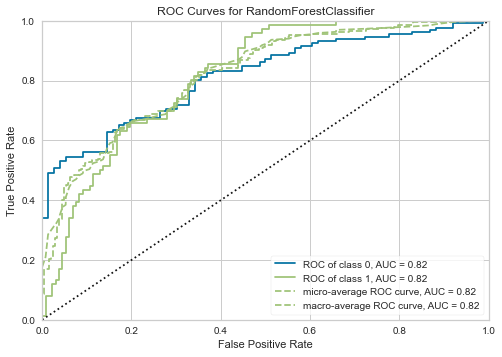

In [23]:
plot_model(tuned_rf, plot = 'auc')

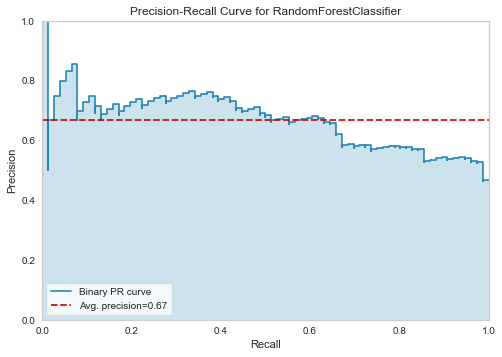

In [24]:
plot_model(tuned_rf, plot = 'pr')

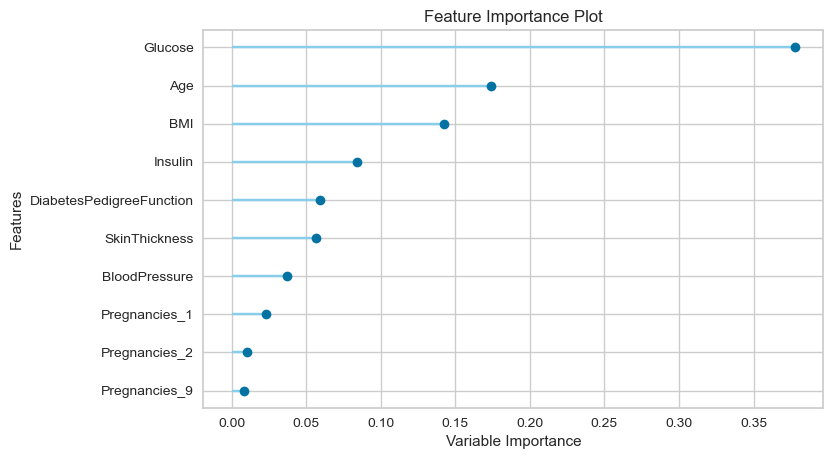

In [25]:
plot_model(tuned_rf, plot='feature')

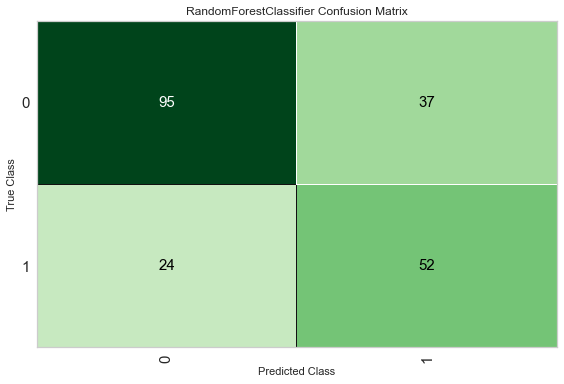

In [26]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [27]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7067,0.8152,0.6842,0.5843,0.6303,0.3898,0.3931


In [29]:
final_rf = finalize_model(tuned_rf)

In [30]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [31]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8173,0.9069,0.8289,0.7159,0.7683,0.6188,0.6234


In [32]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,1,89,66,23,94,28.1,0.167,21,0,0,0.8394
1,5,116,74,0,0,25.6,0.201,30,0,0,0.6778
2,7,107,74,0,0,29.6,0.254,31,1,0,0.5406
3,1,146,56,0,0,29.7,0.564,29,0,1,0.6053
4,7,103,66,32,0,39.1,0.344,31,1,0,0.5253


In [34]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Outcome'], unseen_predictions['Label'], metric = 'Accuracy')

0.7792

In [35]:
save_model(final_rf,'Final RF Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features

In [37]:
saved_final_rf = load_model('Final RF Model')

Transformation Pipeline and Model Successfully Loaded


In [38]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [39]:
new_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,1,89,66,23,94,28.1,0.167,21,0,0,0.8394
1,5,116,74,0,0,25.6,0.201,30,0,0,0.6778
2,7,107,74,0,0,29.6,0.254,31,1,0,0.5406
3,1,146,56,0,0,29.7,0.564,29,0,1,0.6053
4,7,103,66,32,0,39.1,0.344,31,1,0,0.5253


In [41]:

check_metric(new_prediction['Outcome'], new_prediction['Label'], metric = 'Accuracy')

0.7792